## House Pricing

---

The aim of this project was applying machine learning concepts to predict house prices, based on a set of given attributes. The dataset used was downloaded from Kaggle. The methods used to model the predictors were Decision Tree and K-Nearest Neighbors Regressors.

It has been used holdout (75% train, 25% test) for model evaluation, combined with 2-fold cross-validation for hyper-parameter tuning. Moreover, hyper-parameters have been adjusted using either random-search or bayesian-optimization.

In [1]:
import pandas
data = pandas.read_csv("kaggleCompetition.csv")
data = data.values
X = data[0:1460,:-1]
y = data[0:1460,-1]
X_comp = data[1460:,:-1] # Apply the best model to this
y_comp = data[1460:,-1]

KeyboardInterrupt: 

In [100]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_comp = scaler.transform(X_comp)

In [101]:
from sklearn.model_selection import cross_val_score, train_test_split

#Holdout for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## DecisionTreeRegressor

#### No tuning

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from math import sqrt as root


tree1 = DecisionTreeRegressor()
tree1.fit(X=X_train, y=y_train)

y_test_pred = tree1.predict(X_test)
print(root(metrics.mean_squared_error(y_test, y_test_pred)))

0.18103570865775162


#### Random Search

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold
import numpy as np
from scipy.stats import uniform
from skopt.space import Integer, Real, Categorical

# Search space
param_grid = {'criterion': ['mse', 'friedman_mse'], 'min_samples_split': Real(0.1,1.0)}


# random_state=0 for reproducibility
cv_grid = KFold(n_splits=2, shuffle=True, random_state=0)
                                                           
budget = 20
# random.seed = 0 for reproducibility
np.random.seed(0)
tree2 = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=cv_grid, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )

tree2.fit(X=X_train, y=y_train)

y_test_pred = tree2.predict(X_test)
print(root(metrics.mean_squared_error(y_test, y_test_pred)))

print(tree2.best_params_)
print(root(-tree2.best_score_))


Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.21228843897331975
{'criterion': 'friedman_mse', 'min_samples_split': array([0.16393245])}
0.23022294102648816


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


#### Bayesian Search

In [104]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

param_grid = {'criterion': ['mse', 'friedman_mse'], 'min_samples_split': Real(0.1,1.0)}

tree3 = BayesSearchCV(DecisionTreeRegressor(), param_grid,scoring='neg_mean_squared_error',cv=cv_grid,n_jobs=1, verbose=1, n_iter=budget)

tree3.fit(X=X_train, y=y_train)

y_test_pred = tree3.predict(X_test)
print(root(metrics.mean_squared_error(y_test, y_test_pred)))

tree3.best_params_
root(-tree3.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\users\merii\desktop\mbda\2_second_term\bd intelligence\src\scikit-optimize\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


0.18931261339568825


0.22274245838952872

## KNN

#### No tuning

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn1 = KNeighborsRegressor()
knn1.fit(X=X_train, y=y_train)

y_test_pred = knn1.predict(X_test)
print(root(metrics.mean_squared_error(y_test, y_test_pred)))

0.17498917486701013


#### Random Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold

# Search space
weight_options = ['uniform', 'distance']
k_range=list(range(1, 100))

param_grid = {'n_neighbors': k_range, 'weights': weight_options,
             'p': [1,2]}

cv_grid = KFold(n_splits=2, shuffle=True, random_state=0)
                                                           
budget = 20
np.random.seed(0)
knn2 = RandomizedSearchCV(KNeighborsRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=cv_grid, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )

knn2.fit(X=X_train, y=y_train)

y_test_pred = knn2.predict(X_test)
print(root(metrics.mean_squared_error(y_test, y_test_pred)))

knn2.best_params_
root(-knn2.best_score_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.16408230893168824


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.6s finished


0.17908655556655081

### Bayesian Search

In [107]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

param_grid = {'n_neighbors': Integer(1,10), 'weights': weight_options,
             'p': [1,2]}

knn3 = BayesSearchCV(KNeighborsRegressor(), param_grid,scoring='neg_mean_squared_error',cv=cv_grid,n_jobs=1, verbose=1, n_iter=budget)

knn3.fit(X=X_train, y=y_train)

y_test_pred = knn3.predict(X_test)
print(root(metrics.mean_squared_error(y_test, y_test_pred)))

knn3.best_params_
root(-knn3.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
c:\users\merii\desktop\mbda\2_second_term\bd intelligence\src\scikit-optimize\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
c:\users\merii\desktop\mbda\2_second_term\bd intelligence\src\scikit-optimize\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
c:\users\merii\desktop\mbda\2_second_term\bd intelligence\src\scikit-optimize\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
c:\users\merii\desktop\mbda\2_second_term\bd intelligence\src\scikit-optimize\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


0.16204273732335298


0.177091605283565

# Final model

The RMSE from each of the computations are depicted on the following table:

|      |None |Random Search | Bayesian Search
|------|------|------|------|
|  Decision Tree | 0.1911| 0.1849| 0.1893 |
|  KNN | 0.1750| 0.1641| 0.1620|


The conclusions that can be drawn from this table are that hyper-parameter tuning leads to better results than no tuning at all, as expected. An intriguing dissimilarity can be found among the two regressors. Decision Tree shows a greater error compared to KNN. Probably this is linked to the characteristics of the dataset, which have a high impact on the Decision Tree algorithm.

Then, with respect to the hyperparameter tuning methods themselves, no significant differences can be found among the results for the same regressor. In fact, the only difference that these two hyper-parameter tuning methods account for is the time it takes to implement them.

In [108]:
from math import exp
y_comp = knn3.predict(X_comp)

In [109]:
final_submission=[]
id_=1460
for n in range(len(y_comp)):
    id_+=1
    final_submission.append([id_, exp(y_comp[n])])

In [110]:
import csv
with open('final_submission.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Id', 'SalePrice'])
    writer.writerows(final_submission)

After the data was imported into the attached csv file, it was submitted to kaggle. The classification can be found on the following image:

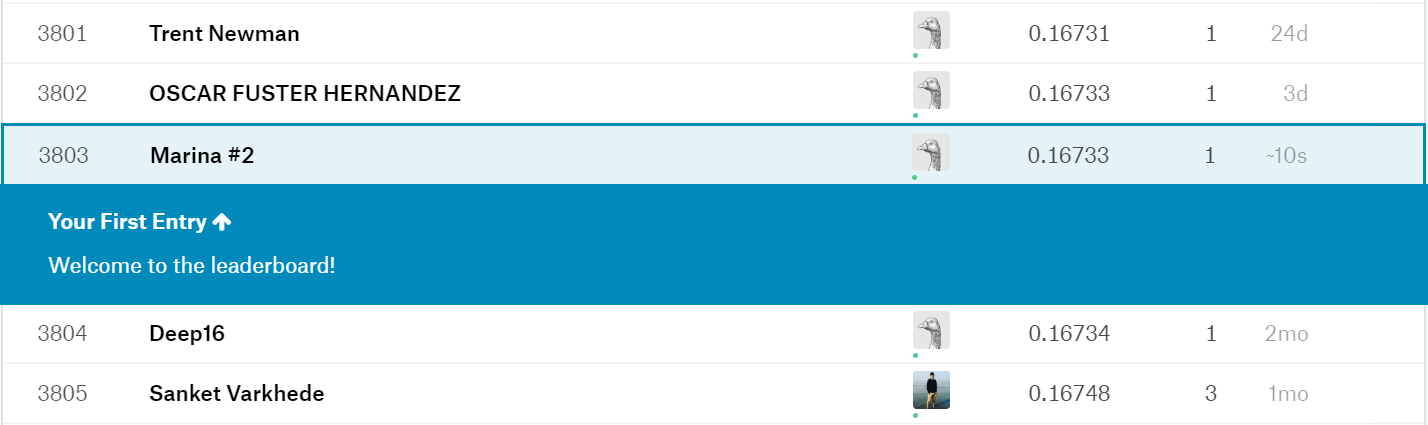